In [3]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')
print(num_classes)

2


In [1]:
!nvidia-smi

Wed Mar 10 18:12:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  On   | 00000000:01:00.0  On |                  N/A |
| 35%   30C    P8    21W / 260W |     99MiB / 11016MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
import datetime

starttime = datetime.datetime.now()

#!python train.py -b 4 -s 1 -l 0.001 -g 0 -pretrained ./yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 300
!python train.py -b 4 -s 1 -l 0.001 -g 0 -pretrained ./yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 2

endtime = datetime.datetime.now()
print(endtime - starttime)

log file path:log/log_2021-03-10_18-13-03.txt
2021-03-10 18:13:03,436 train.py[line:456] INFO: Using device cuda
Start Traing
2021-03-10 18:13:05,782 train.py[line:279] INFO: Starting training:
        Epochs:          2
        Batch size:      4
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   185
        Validation size: 36
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 2
        Train label path:train.txt
        Pretrained:
    
Epoch 1/2:   0%|         | 0/185 [00:00<?, ?img/s]/home/stockchicken/miniconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Epoch 1/2:  41%|▍| 76/185 [00:37<00:37,  2.94img/s/home/stockchicken/miniconda3/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get 

In [33]:
import matplotlib.pyplot as plt
import numpy as np

#loss, loss xy, loss wh, loss obj, loss cls, loss l2
loss_file = open('loss.txt', 'r')
loss = []
loss_xy = []
loss_wh = []
loss_obj = []
loss_cls = []
loss_l2 = []
count = 0

for line in loss_file.readlines():
    loss.append(float(line.split(" ")[0]))
    loss_xy.append(float(line.split(" ")[1]))
    loss_wh.append(float(line.split(" ")[2]))
    loss_obj.append(float(line.split(" ")[3]))
    loss_cls.append(float(line.split(" ")[4]))
    loss_l2.append(float(line.split(" ")[5]))
    count+=1

#print(count)
train_step = np.arange(1, count+1)
loss = np.array(loss)
loss_xy = np.array(loss_xy)
loss_wh = np.array(loss_wh)
loss_obj = np.array(loss_obj)
loss_cls = np.array(loss_cls)
loss_l2 = np.array(loss_l2)


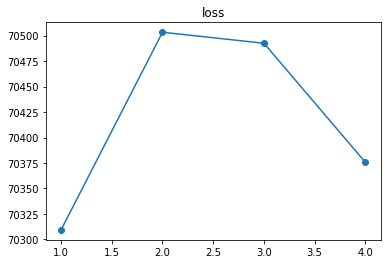

In [34]:
%matplotlib inline
plt.title("loss")
plt.plot(train_step, loss, marker = 'o')

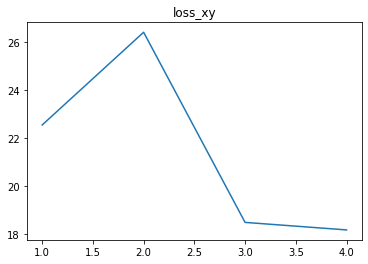

In [35]:
plt.title("loss_xy")
plt.plot(train_step, loss_xy)

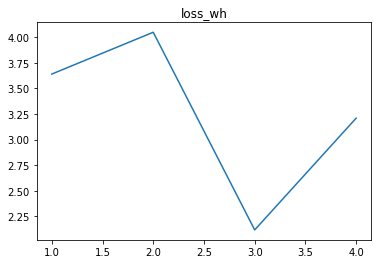

In [36]:
plt.title("loss_wh")
plt.plot(train_step, loss_wh)

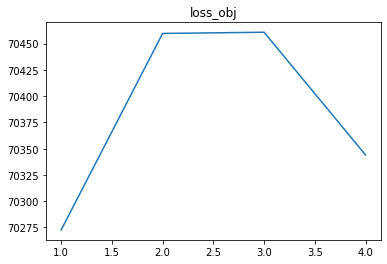

In [37]:
plt.title("loss_obj")
plt.plot(train_step, loss_obj)

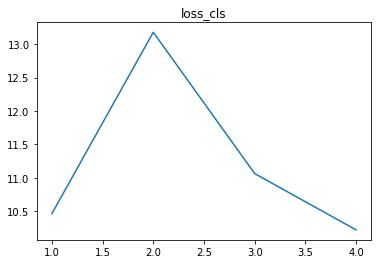

In [38]:
plt.title("loss_cls")
plt.plot(train_step, loss_cls)

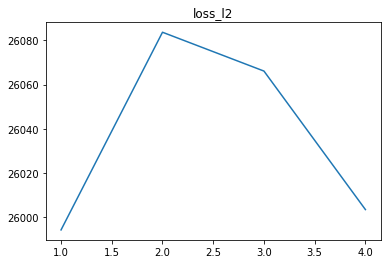

In [39]:
plt.title("loss_l2")
plt.plot(train_step, loss_l2)

In [40]:
#looking at the weights that our model has saved during training
!ls checkpoints

Yolov4_epoch100.pth  Yolov4_epoch1.pth	  Yolov4_epoch290.pth
Yolov4_epoch10.pth   Yolov4_epoch200.pth  Yolov4_epoch300.pth
Yolov4_epoch110.pth  Yolov4_epoch20.pth   Yolov4_epoch30.pth
Yolov4_epoch120.pth  Yolov4_epoch210.pth  Yolov4_epoch40.pth
Yolov4_epoch130.pth  Yolov4_epoch220.pth  Yolov4_epoch50.pth
Yolov4_epoch140.pth  Yolov4_epoch230.pth  Yolov4_epoch60.pth
Yolov4_epoch150.pth  Yolov4_epoch240.pth  Yolov4_epoch70.pth
Yolov4_epoch160.pth  Yolov4_epoch250.pth  Yolov4_epoch80.pth
Yolov4_epoch170.pth  Yolov4_epoch260.pth  Yolov4_epoch90.pth
Yolov4_epoch180.pth  Yolov4_epoch270.pth
Yolov4_epoch190.pth  Yolov4_epoch280.pth


In [6]:
#choose random test image
import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

In [6]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')
print(num_classes)

2


In [256]:
##change the epoch here to the one you would like to use for inference
import datetime
starttime = datetime.datetime.now()
num_classes = 2
#!python models.py {num_classes} checkpoints/Yolov4_epoch300.pth test/0007.jpg data/_classes.txt
!python models.py {num_classes} checkpoints/Yolov4_epoch300.pth valid/0042.jpg data/_classes.txt
endtime = datetime.datetime.now()
print(endtime - starttime)

Model Start!!
[1764, 1541, 2385, 3454, 1]
NotWearTheLifeJacket: 0.999998
save plot results to predictions.jpg
Model End!!
0:00:03.581707


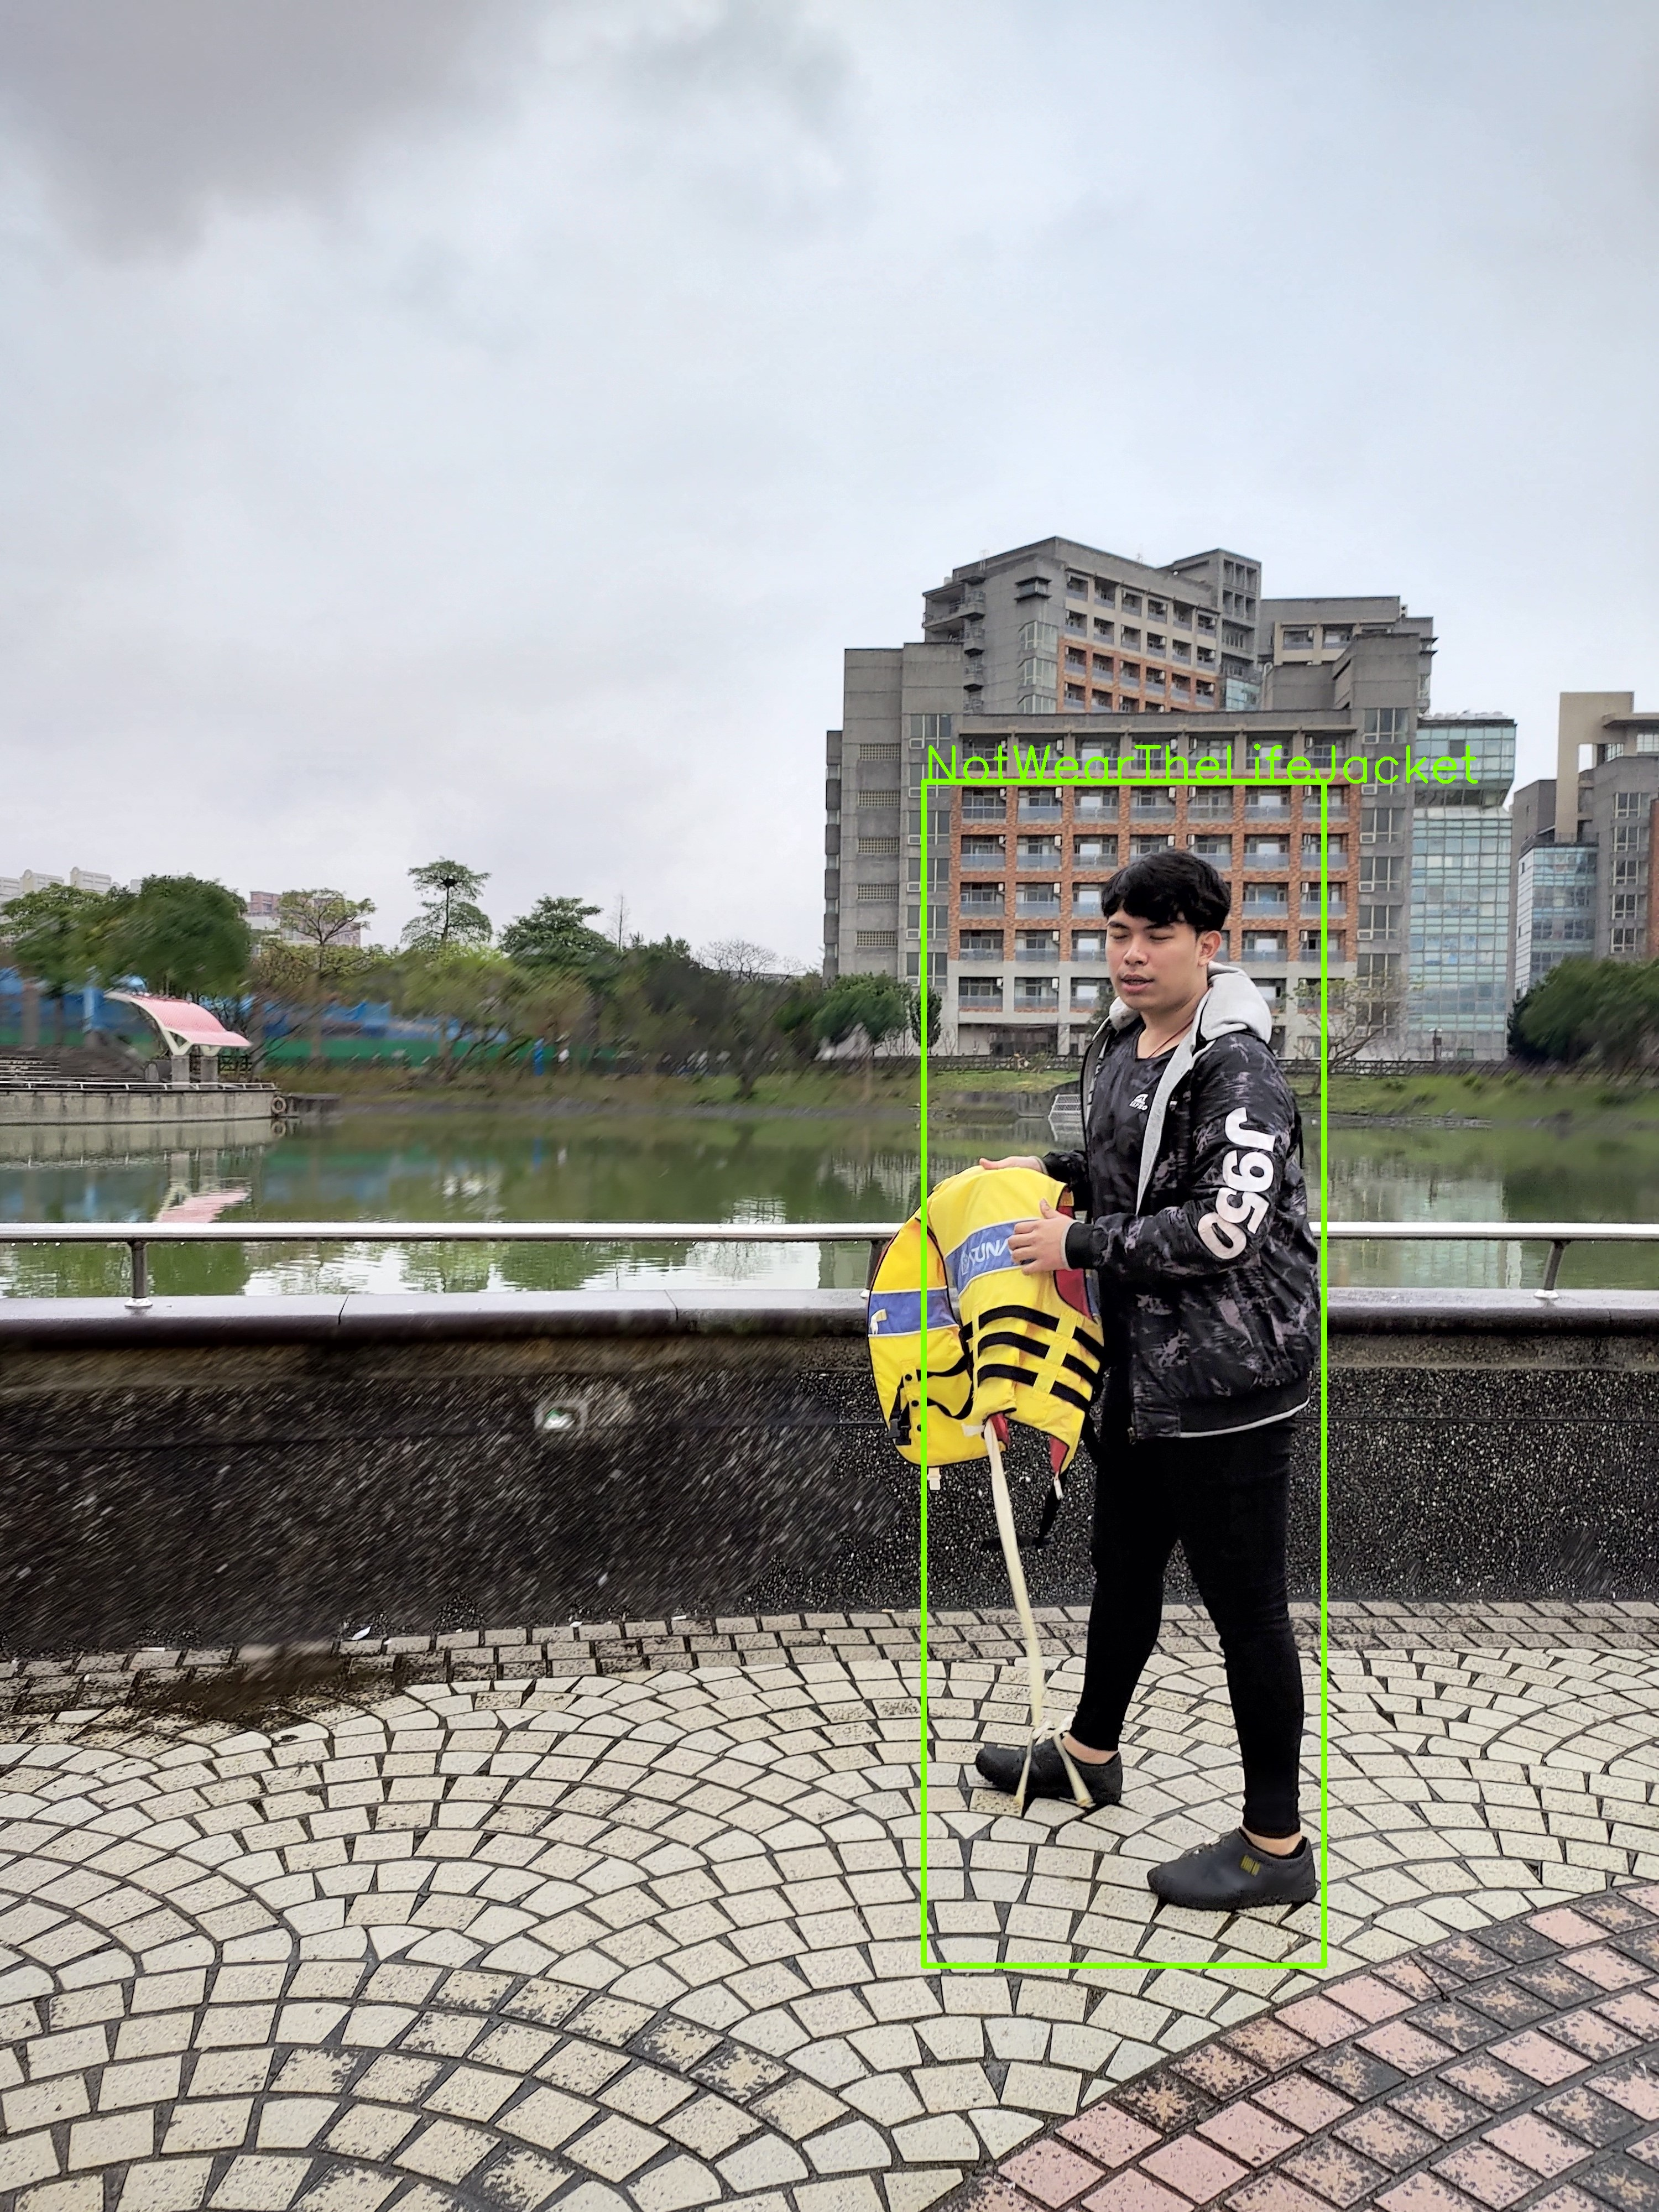

In [257]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')

In [167]:
import numpy as np
from tool.utils import *
from models import *
import cv2
import torch
from torch import nn
import torch.nn.functional as F
import copy

In [168]:
model = Yolov4(n_classes=2)
pretrained_dict = torch.load('checkpoints/Yolov4_epoch300.pth', map_location=torch.device('cuda'))
model.load_state_dict(pretrained_dict)
model.cuda()

Yolov4(
  (down1): DownSample1(
    (conv1): Conv_Bn_Activation(
      (conv): ModuleList(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Mish()
      )
    )
    (conv2): Conv_Bn_Activation(
      (conv): ModuleList(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Mish()
      )
    )
    (conv3): Conv_Bn_Activation(
      (conv): ModuleList(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Mish()
      )
    )
    (conv4): Conv_Bn_Activation(
      (conv): ModuleList(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNo

In [264]:
#conf_thres
for conf_thres in range(1,10,1):
    truth = {}
    tp = np.zeros([2])
    fp = np.zeros([2])
    fn = np.zeros([2])
    tn = np.zeros([2])
    f = open('data/val.txt', 'r', encoding='utf-8')
    for line in f.readlines():
        data = line.split(" ")
        truth[data[0]] = []
        for i in data[1:]:
            truth[data[0]].append([int(j) for j in i.split(',')])
        #print(data[0])
        gt=truth[data[0]]
    
        img = cv2.imread('valid/'+data[0])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape
        #print(h, w)
        sized = cv2.resize(img, (608, 608))
        boxes = do_detect(model, sized, conf_thres/10, 2, 0.4, 1)
    
        # 模型偶爾沒辦法預測出bbox，塞入一個整張都是背景的bbox
        if len(boxes) == 0:
            boxes = np.array([[0.5, 0.5, 1, 1, 1.0, 0.0, 0.0]])
        gt_normal=copy.deepcopy(gt)
        #print(type(gt))
        for count,val in enumerate(gt): #normalize
            gt_normal[count][0]=((val[2]+val[0])/2.0)/w
            gt_normal[count][1]=((val[3]+val[1])/2.0)/h
            gt_normal[count][2]=(val[2]-val[0])/w
            gt_normal[count][3]=(val[3]-val[1])/h
        
        #print(gt_normal)
        gt_normal=np.array(gt_normal)
        #print(gt_normal)
        gt_normal=torch.from_numpy(gt_normal)
        #print(gt_normal)
        #gt_normal=torch.tensor(gt_normal)
        boxes=torch.tensor(boxes)
        #print(gt)
        #ious=np.zeros((len(gt_normal),len(boxes)))
        ious=np.zeros((len(boxes),len(gt_normal)))
        #print(ious)
    
        for cn1,i in enumerate(boxes): #ious
            for cn2,j in enumerate(gt_normal):
                #print(ious.shape)
                #print(cn2)
                ious[cn1][cn2]=bbox_ious(i, j, x1y1x2y2=0)
            
        #開始算正確率
        #tp,fp,fn,tn=0,0,0,0
        #print('boxes')
        #print(boxes.size())
        boxes_cls=boxes[:,4:].numpy()
        boxes_cls_max=np.zeros([boxes.shape[0]], dtype=int)
        #print(boxes_cls_max.shape)
        for num,i in enumerate(boxes_cls):
            max_=0.0
            cn=0
            for index,j in enumerate(i):
                if j>max_:
                    max_=j
                    cn=index
            boxes_cls_max[num]=cn
        #print(boxes_cls_max)
        #print(boxes_cls)
        for cn,i in enumerate(ious):
            count=0
            max_iou=0.0
            for index,j in enumerate(i) :
                if j>max_iou:
                    count=index
                    max_iou=j
            if max_iou>=0.5:#若iou大於設定值，則參與計算正確率的計數器(TP、FP、FN、TN)中
                #print('check1')
                #Wear
                if (gt_normal[count][4] == 0)&(boxes_cls_max[cn] == 1):
                    tp[0]+=1
                if (gt_normal[count][4] != 0)&(boxes_cls_max[cn] == 1):
                    fp[0]+=1
                if (gt_normal[count][4] == 0)&(boxes_cls_max[cn] != 1):
                    fn[0]+=1
                if (gt_normal[count][4] != 0)&(boxes_cls_max[cn] != 1):
                    tn[0]+=1
                #NotWear
                if (gt_normal[count][4] == 1)&(boxes_cls_max[cn] == 2):
                    tp[1]+=1
                if (gt_normal[count][4] != 1)&(boxes_cls_max[cn] == 2):
                    fp[1]+=1
                if (gt_normal[count][4] == 1)&(boxes_cls_max[cn] != 2):
                    fn[1]+=1
                if (gt_normal[count][4] != 1)&(boxes_cls_max[cn] != 2):
                    tn[1]+=1


    #print(tp,tn,fp,fn)
    acc = ((tp + tn)) / ((tp + tn + fp + fn))
    recall = tp / (tp+fn)
    prec = tp / (tp+fp)
    print('with conf_thresh:{} acc={} recall={} prec={}'.format(conf_thres/10,acc,recall,prec))

with conf_thresh:0.1 acc=[0.9787234 1.       ] recall=[0.97368421 1.        ] prec=[1. 1.]
with conf_thresh:0.2 acc=[0.9787234 1.       ] recall=[0.97368421 1.        ] prec=[1. 1.]
with conf_thresh:0.3 acc=[0.9787234 1.       ] recall=[0.97368421 1.        ] prec=[1. 1.]
with conf_thresh:0.4 acc=[0.9787234 1.       ] recall=[0.97368421 1.        ] prec=[1. 1.]
with conf_thresh:0.5 acc=[0.9787234 1.       ] recall=[0.97368421 1.        ] prec=[1. 1.]
with conf_thresh:0.6 acc=[0.9787234 1.       ] recall=[0.97368421 1.        ] prec=[1. 1.]
with conf_thresh:0.7 acc=[0.9787234 1.       ] recall=[0.97368421 1.        ] prec=[1. 1.]
with conf_thresh:0.8 acc=[0.97727273 1.        ] recall=[0.97222222 1.        ] prec=[1. 1.]
with conf_thresh:0.9 acc=[0.97727273 1.        ] recall=[0.97222222 1.        ] prec=[1. 1.]


In [270]:
#conf_thres
for conf_thres in range(1,10,1):
    for nms_thres in range(1,10,1):
        truth = {}
        tp = np.zeros([2])
        fp = np.zeros([2])
        fn = np.zeros([2])
        tn = np.zeros([2])
        f = open('data/val.txt', 'r', encoding='utf-8')
        for line in f.readlines():
            data = line.split(" ")
            truth[data[0]] = []
            for i in data[1:]:
                truth[data[0]].append([int(j) for j in i.split(',')])
            #print(data[0])
            gt=truth[data[0]]
    
            img = cv2.imread('valid/'+data[0])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            h, w, _ = img.shape
            #print(h, w)
            sized = cv2.resize(img, (608, 608))
            boxes = do_detect(model, sized, conf_thres/10, 2, nms_thres/10, 1)
    
            # 模型偶爾沒辦法預測出bbox，塞入一個整張都是背景的bbox
            if len(boxes) == 0:
                boxes = np.array([[0.5, 0.5, 1, 1, 1.0, 0.0, 0.0]])
            gt_normal=copy.deepcopy(gt)
            #print(type(gt))
            for count,val in enumerate(gt): #normalize
                gt_normal[count][0]=((val[2]+val[0])/2.0)/w
                gt_normal[count][1]=((val[3]+val[1])/2.0)/h
                gt_normal[count][2]=(val[2]-val[0])/w
                gt_normal[count][3]=(val[3]-val[1])/h
        
            #print(gt_normal)
            gt_normal=np.array(gt_normal)
            #print(gt_normal)
            gt_normal=torch.from_numpy(gt_normal)
            #print(gt_normal)
            #gt_normal=torch.tensor(gt_normal)
            boxes=torch.tensor(boxes)
            #print(gt)
            #ious=np.zeros((len(gt_normal),len(boxes)))
            ious=np.zeros((len(boxes),len(gt_normal)))
            #print(ious)
    
            for cn1,i in enumerate(boxes): #ious
                for cn2,j in enumerate(gt_normal):
                    #print(ious.shape)
                    #print(cn2)
                    ious[cn1][cn2]=bbox_ious(i, j, x1y1x2y2=0)
            
            #開始算正確率
            #tp,fp,fn,tn=0,0,0,0
            #print('boxes')
            #print(boxes.size())
            boxes_cls=boxes[:,4:].numpy()
            boxes_cls_max=np.zeros([boxes.shape[0]], dtype=int)
            #print(boxes_cls_max.shape)
            for num,i in enumerate(boxes_cls):
                max_=0.0
                cn=0
                for index,j in enumerate(i):
                    if j>max_:
                        max_=j
                        cn=index
                boxes_cls_max[num]=cn
            #print(boxes_cls_max)
            #print(boxes_cls)
            for cn,i in enumerate(ious):
                count=0
                max_iou=0.0
                for index,j in enumerate(i) :
                    if j>max_iou:
                        count=index
                        max_iou=j
                if max_iou>=0.5:#若iou大於設定值，則參與計算正確率的計數器(TP、FP、FN、TN)中
                    #print('check1')
                    #Wear
                    if (gt_normal[count][4] == 0)&(boxes_cls_max[cn] == 1):
                        tp[0]+=1
                    if (gt_normal[count][4] != 0)&(boxes_cls_max[cn] == 1):
                        fp[0]+=1
                    if (gt_normal[count][4] == 0)&(boxes_cls_max[cn] != 1):
                        fn[0]+=1
                    if (gt_normal[count][4] != 0)&(boxes_cls_max[cn] != 1):
                        tn[0]+=1
                    #NotWear
                    if (gt_normal[count][4] == 1)&(boxes_cls_max[cn] == 2):
                        tp[1]+=1
                    if (gt_normal[count][4] != 1)&(boxes_cls_max[cn] == 2):
                        fp[1]+=1
                    if (gt_normal[count][4] == 1)&(boxes_cls_max[cn] != 2):
                        fn[1]+=1
                    if (gt_normal[count][4] != 1)&(boxes_cls_max[cn] != 2):
                        tn[1]+=1


        #print(tp,tn,fp,fn)
        acc = ((tp + tn)) / ((tp + tn + fp + fn))
        recall = tp / (tp+fn)
        prec = tp / (tp+fp)
        print('with conf_thresh:{} nms_thresh:{} acc={} recall={} prec={}'.format(conf_thres/10,nms_thres/10,acc,recall,prec))

with conf_thresh:0.1 nms_thresh:0.1 acc=[0.97826087 1.        ] recall=[0.97297297 1.        ] prec=[1. 1.]
with conf_thresh:0.1 nms_thresh:0.2 acc=[0.9787234 1.       ] recall=[0.97368421 1.        ] prec=[1. 1.]
with conf_thresh:0.1 nms_thresh:0.3 acc=[0.9787234 1.       ] recall=[0.97368421 1.        ] prec=[1. 1.]
with conf_thresh:0.1 nms_thresh:0.4 acc=[0.9787234 1.       ] recall=[0.97368421 1.        ] prec=[1. 1.]
with conf_thresh:0.1 nms_thresh:0.5 acc=[0.9787234 1.       ] recall=[0.97368421 1.        ] prec=[1. 1.]
with conf_thresh:0.1 nms_thresh:0.6 acc=[0.97959184 1.        ] recall=[0.975 1.   ] prec=[1. 1.]
with conf_thresh:0.1 nms_thresh:0.7 acc=[0.98275862 1.        ] recall=[0.97959184 1.        ] prec=[1. 1.]
with conf_thresh:0.1 nms_thresh:0.8 acc=[0.96907216 0.97938144] recall=[0.96385542 1.        ] prec=[1.    0.875]
with conf_thresh:0.1 nms_thresh:0.9 acc=[0.95698925 0.96774194] recall=[0.94701987 1.        ] prec=[1.         0.85365854]
with conf_thresh:0.2 nms

In [183]:
acc = ((tp + tn)) / ((tp + tn + fp + fn))
print(acc)

[0.9787234 1.       ]


In [184]:
recall = tp / (tp+fn)
print(recall)

[0.97368421 1.        ]


In [185]:
prec = tp / (tp+fp)
print(prec)

[1. 1.]
